# Task_filtering

## Task description

Each task requires you to implement all three types of filters: FIR, IIR, and Adaptive LMS, using different parameters and observe the performance for noise reduction.

Variant 6:

- Design an FIR filter with the following coefficients and implement it in Python to reduce noise in a noisy sinusoidal signal.
$$ \text{FIR Filter Coefficients}: b = \{0.25, 0.25, 0.25, 0.25\} $$

- Design an IIR filter with the following coefficients and implement it in Python to reduce noise in the same noisy sinusoidal signal.
$$ \text{IIR Filter Coefficients}: b = \{1, 1, 1\}, a = \{1, −0.5\} $$

- Implement an adaptive LMS filter in Python with a step size $μ = 0.1$ and filter length $M = 6$ to reduce noise in the same noisy sinusoidal signal.

## Python code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate noisy signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs)
clean_signal = np.sin(2 * np.pi * 5 * t)
noisy_signal = clean_signal + 0.5 * np.random.randn(fs)


In [2]:
# 1. FIR Filter Implementation
fir_coeffs = np.array([0.25, 0.25, 0.25, 0.25])

def fir_filter(x, b):
    y = np.zeros_like(x)
    M = len(b)
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n - M + 1 : n + 1][::-1])
    return y

fir_output = fir_filter(noisy_signal, fir_coeffs)


In [6]:
# 2. IIR Filter Implementation
b_iir = np.array([1, 1, 1])  # Numerator coefficients
a_iir = np.array([1, -0.5])   # Denominator coefficients

def iir_filter(x, b, a):
    M = len(b)  # Length of numerator coefficients (b)
    N = len(a)  # Length of denominator coefficients (a)
    y = np.zeros(len(x))

    for n in range(len(x)):
        # Feedforward part (b coefficients)
        x_slice = x[max(0, n-M+1):n+1]  # Input signal slice
        y[n] = np.dot(b[:len(x_slice)], x_slice[::-1])  # Apply reverse convolution for numerator
        
        # Denominator part (feedback, a coefficients), skip the first sample
        if n >= 1:
            y_slice = y[max(0, n-N+1):n]  # Output signal slice
            y[n] -= np.dot(a[1:min(N, len(y_slice)+1)], y_slice[::-1])  # Apply reverse convolution for feedback

    return y

iir_output = iir_filter(noisy_signal, b_iir, a_iir)


In [4]:
# 3. Adaptive LMS Filter
def lms_filter(x, d, mu, num_taps):
    w = np.zeros(num_taps)
    y = np.zeros_like(x)
    e = np.zeros_like(x)
    n = len(x)
    
    for i in range(num_taps, n):
        x_segment = x[i - num_taps : i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment
    return y, e, w

step_size = 0.1
filter_length = 6

lms_output, error, weights = lms_filter(
    noisy_signal, clean_signal, mu=step_size, num_taps=filter_length
)


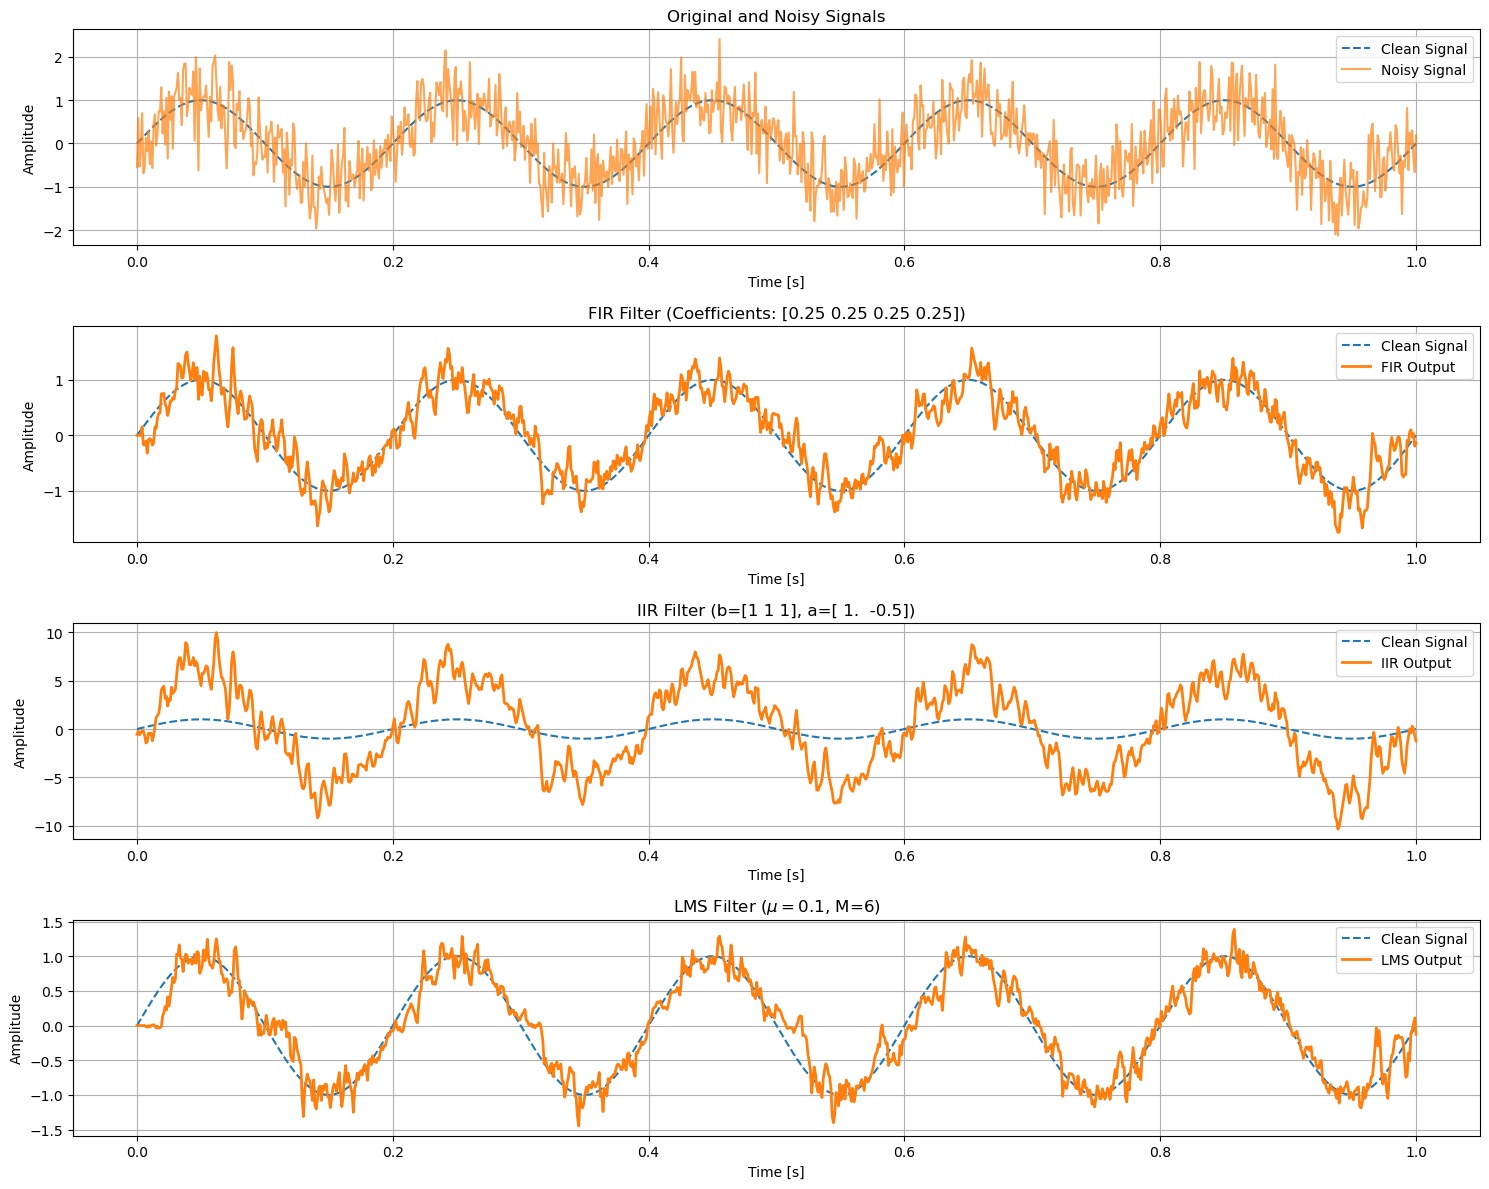

In [7]:
# Plot results
plt.figure(figsize=(15, 12))

# Original and Noisy Signals
plt.subplot(411)
plt.plot(t, clean_signal, label='Clean Signal', linestyle='--')
plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
plt.title('Original and Noisy Signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# FIR Filter Results
plt.subplot(412)
plt.plot(t, clean_signal, label='Clean Signal', linestyle='--')
plt.plot(t, fir_output, label='FIR Output', linewidth=2)
plt.title(f'FIR Filter (Coefficients: {fir_coeffs})')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# IIR Filter Results
plt.subplot(413)
plt.plot(t, clean_signal, label='Clean Signal', linestyle='--')
plt.plot(t, iir_output, label='IIR Output', linewidth=2)
plt.title(f'IIR Filter (b={b_iir}, a={a_iir})')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# LMS Filter Results
plt.subplot(414)
plt.plot(t, clean_signal, label='Clean Signal', linestyle='--')
plt.plot(t, lms_output, label='LMS Output', linewidth=2)
plt.title(f'LMS Filter ($\\mu={step_size}$, M={filter_length})')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()